Data Loaded. Total Samples: 2036

--- Descriptive Statistics ---
Feature      | Mean       | Std Dev   
----------------------------------------
AAPL_Close   | 137.06     | 67.82     
AAPL_Open    | 136.93     | 67.75     
AAPL_Vol     | 93941877.70 | 54325424.89
MSFT_Close   | 266.52     | 126.90    
MSFT_Vol     | 27824474.12 | 12388381.79
TSLA_Close   | 185.88     | 128.59    
TSLA_Vol     | 123278664.39 | 75929935.33

--- Outlier Detection ---
AAPL_Close  : 0 outliers detected.
AAPL_Open   : 0 outliers detected.
AAPL_Vol    : 86 outliers detected.
MSFT_Close  : 0 outliers detected.
MSFT_Vol    : 115 outliers detected.
TSLA_Close  : 0 outliers detected.
TSLA_Vol    : 154 outliers detected.


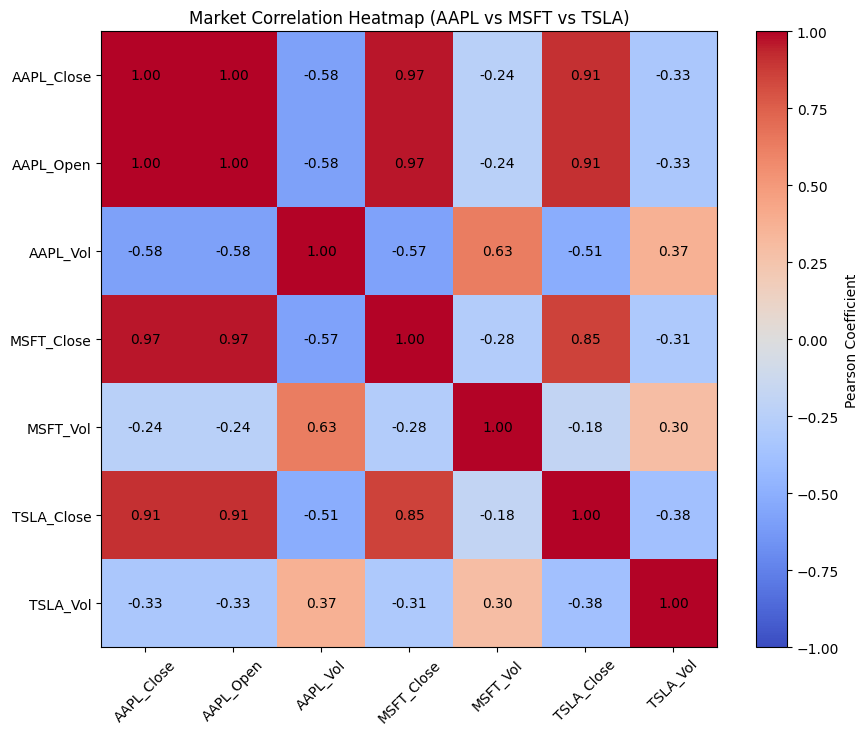

In [9]:
# PART A: Exploratory Data Analysis (EDA) & Data Preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# DATA LOADING & CLEANING

df_raw = pd.read_csv('stock_market_data.csv', header=[0,1])

# Target: Apple Close Price
# Features: Apple Open/Vol, Microsoft Close/Vol, Tesla Close/Vol
data = pd.DataFrame()
data['AAPL_Close'] = df_raw['Close']['AAPL']
data['AAPL_Open']  = df_raw['Open']['AAPL']
data['AAPL_Vol']   = df_raw['Volume']['AAPL']
data['MSFT_Close'] = df_raw['Close']['MSFT']
data['MSFT_Vol']   = df_raw['Volume']['MSFT']
data['TSLA_Close'] = df_raw['Close']['TSLA']
data['TSLA_Vol']   = df_raw['Volume']['TSLA']

# Remove rows with missing values (NaN) to ensure mathematical stability
data = data.dropna()
print(f"Data Loaded. Total Samples: {len(data)}")

# STATISTICAL ANALYSIS (FROM SCRATCH)

# Std Dev = sqrt( Σ(x - μ)² / N )

def get_stats(values):
    n = len(values)
    mean = sum(values) / n
    variance = sum((x - mean)**2 for x in values) / n
    return mean, variance ** 0.5

print("\n--- Descriptive Statistics ---")
print(f"{'Feature':<12} | {'Mean':<10} | {'Std Dev':<10}")
print("-" * 40)
for col in data.columns:
    mu, sigma = get_stats(data[col].values)
    print(f"{col:<12} | {mu:<10.2f} | {sigma:<10.2f}")

# OUTLIER DETECTION (IQR METHOD)
# Logic: Data points outside [Q1 - 1.5*IQR, Q3 + 1.5*IQR] are outliers.
print("\n--- Outlier Detection ---")
for col in data.columns:
    sorted_vals = sorted(data[col].values)
    n = len(sorted_vals)
    q1, q3 = sorted_vals[int(0.25*n)], sorted_vals[int(0.75*n)]
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    outliers = sum(1 for x in sorted_vals if x < lower or x > upper)
    print(f"{col:<12}: {outliers} outliers detected.")

# CORRELATION MATRIX (MATH IMPLEMENTATION)
# Formula: Pearson Correlation (r)
# r = Covariance(X, Y) / (StdDev(X) * StdDev(Y))

def get_correlation(x, y):
    mu_x, sigma_x = get_stats(x)
    mu_y, sigma_y = get_stats(y)
    covariance = sum((x[i] - mu_x) * (y[i] - mu_y) for i in range(len(x))) / len(x)
    return covariance / (sigma_x * sigma_y)

# Compute 7x7 Matrix
cols = data.columns
matrix = np.zeros((len(cols), len(cols)))
for i in range(len(cols)):
    for j in range(len(cols)):
        matrix[i, j] = get_correlation(data[cols[i]].values, data[cols[j]].values)

# Visualization
plt.figure(figsize=(10, 8))
plt.imshow(matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Pearson Coefficient')
plt.xticks(range(len(cols)), cols, rotation=45)
plt.yticks(range(len(cols)), cols)
plt.title("Market Correlation Heatmap (AAPL vs MSFT vs TSLA)")
for i in range(len(cols)):
    for j in range(len(cols)):
        plt.text(j, i, f"{matrix[i, j]:.2f}", ha='center', va='center', color='black')
plt.show()